In [1]:
# Conectar a un servidor
import mysql.connector
# Connect to the database
cnx = mysql.connector.connect(
    host='127.0.0.1', # Saber si está vivo o muerto
    port=3306,
    user="mike",
    password="s3cre3t"
)

cnx.close()

ProgrammingError: 1045 (28000): Access denied for user 'mike'@'localhost' (using password: YES)

## Tareas para la preparación de datos
### ¿Por qué preparar datos?
    Preparar datos es necesario para la mayoria de tecnicas cuantitativas.
* El propocito es transformar los datos de tal forma que la información que contiene este mejor expuesta para la tecnica que se va a utilizar.
* Preparara los datos permite que los errores de predicción deberían ser mejores o en el peor de los casos similares, esto en comparación de la data inicial.
* La preparación de datos también soporta al analisra para producir mejores modelos de una manera más rápida y eficiente.
* Tener buenos datos es un pre-requisito para producir modelos efectivos de cualquier tipo.
* Los datos necesitn ser formateados para cada programa en particular (weka, arff, python)
* Los datos necesitan ser decuados para un método en particular.
* Los datos en la vida real están **Sucios**:

      Incompletos: Falta de valores en los atributos, carecen de algunos atributos de interes, solo tienen datos agregados, Edad="".

      Anómalos: Fuera de rango, errores ejemplo: Edad=-4

      Incosistentes: contiene discrepancias en códigos y nombres, Edad=122, cumpleaños=03/13/1977



**Causas por las cuales se pueden generar datos incompletos**
- Factores humanos: Mal capturado
- Factores de software: validación de campos y formatos
- Factor de tiempo: fecha de recolección de los datos y fecha de uso de los datos.
- Factor de recolección, son datos no obligatorios pero lo eran


**Causas de tener datos anómalos**
- Factores humanos
- Instrumento de recolección defectuoso
- Errores de transmisión de datos
- Diferentes fuentes de datos
- Registros duplicados
- Violación de dependencias funcionales (modificación de datos relacionados)


### Tareas para la preparación de datos
Si no hay calidad en los datos, no esperes calidad en los resultados.

Para tener decisiones de calidad deben de basarse en datos de calidad.

Si incrustamos modelos en datos duplicado, el resultado es alterado y si generamos modelos con datos perdidos tendremos como resultados estadísticas o modelos engañados o incorrectos.

La selección de datos, la limpieza y la transformación comprende la mayor parte del trabajo de construir los modelos y los almacenes de datos.

### Tareas
1. Limpieza de datos
 
       objetivo: completar valores faltantes, suavizar datos ruidosos, identificar o remover outliers y resolver inconsistencias
2. Integración de datos

       Integrar multiples bases de datos, cubos de datos o archivos

3. Transformación de datos

       Objetivo: Normalización y agregación (totalización)

4. Reducción de los datos

        Objetivos:
   
           - Incrementar la eficiencia computacional
           - Reducir datos con particular importancia especialmente para datos númericos

In [1]:
import os
os.chdir('/home/manuel/Descargas/data')
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


### Caso marketing directo
El conjunto de datos incluye la información de un vendedor directo que comercializa productos solo por correo. Envía catalogos con las caracteristicas del producto con los clientes, luego estos realizan pedidos directamente desde los catalogos

El cientifico de datos, desarrolla registos de clientes para saber que hace que algunos clientes gasten más que otros.
 El DataSet (conjunto de datos) incluyen n= 1000 clientes y las siguientes variables:

* Edad (del cientes; mayor / mediano / joven)
* Genero (masculino y Femenino)
* Vivienda (si el cliente es propietario de la cas; si/no)
* Ecivil (soltero / casado)
* Ubicación (lejos/cerca; en términos de distancia a la tienda física más cercana que vende productos similares)
* Salario (salario anual del cliente en dolares)
* Hijos (Número de hijos 0-3)
* Historial (del volumen de compra anterior; bajo-medio-alto-NA, NA significa que este cleinte no ha comprado)
* Catalogos
* Monto (doláres)

Función objetivo: explicar monto gastado en términos de las características del cleinte proporcionadas

Data set: Marketing.csv

In [3]:
df = pd.read_csv("Marketing.csv", sep=';')
df.head(100)

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,NaN
...,...,...,...,...,...,...,...,...,...,...
95,Joven,Masculino,Alquilada,Casado,Cerca,27400,1,Bajo,6,278.0
96,Media,Femenino,Propia,Casado,Cerca,110400,3,Bajo,24,1093.0
97,Joven,Femenino,Alquilada,Soltero,Lejos,21100,1,Bajo,6,470.0
98,Media,Masculino,Propia,Casado,Cerca,81200,0,Alto,24,1856.0


**Explicar monto gastado en términos de las características del cliente proporcionadas**

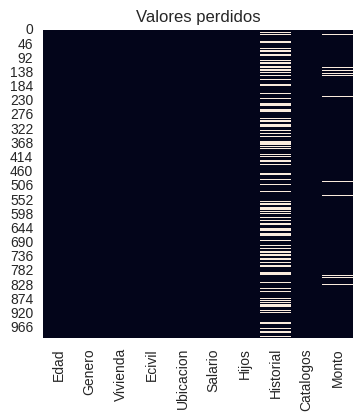

In [5]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(4,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Valores perdidos')
plt.show()

In [7]:
df.isnull().sum()

Edad           0
Genero         0
Vivienda       0
Ecivil         0
Ubicacion      0
Salario        0
Hijos          0
Historial    303
Catalogos      0
Monto         39
dtype: int64

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

<Figure size 100x100 with 0 Axes>

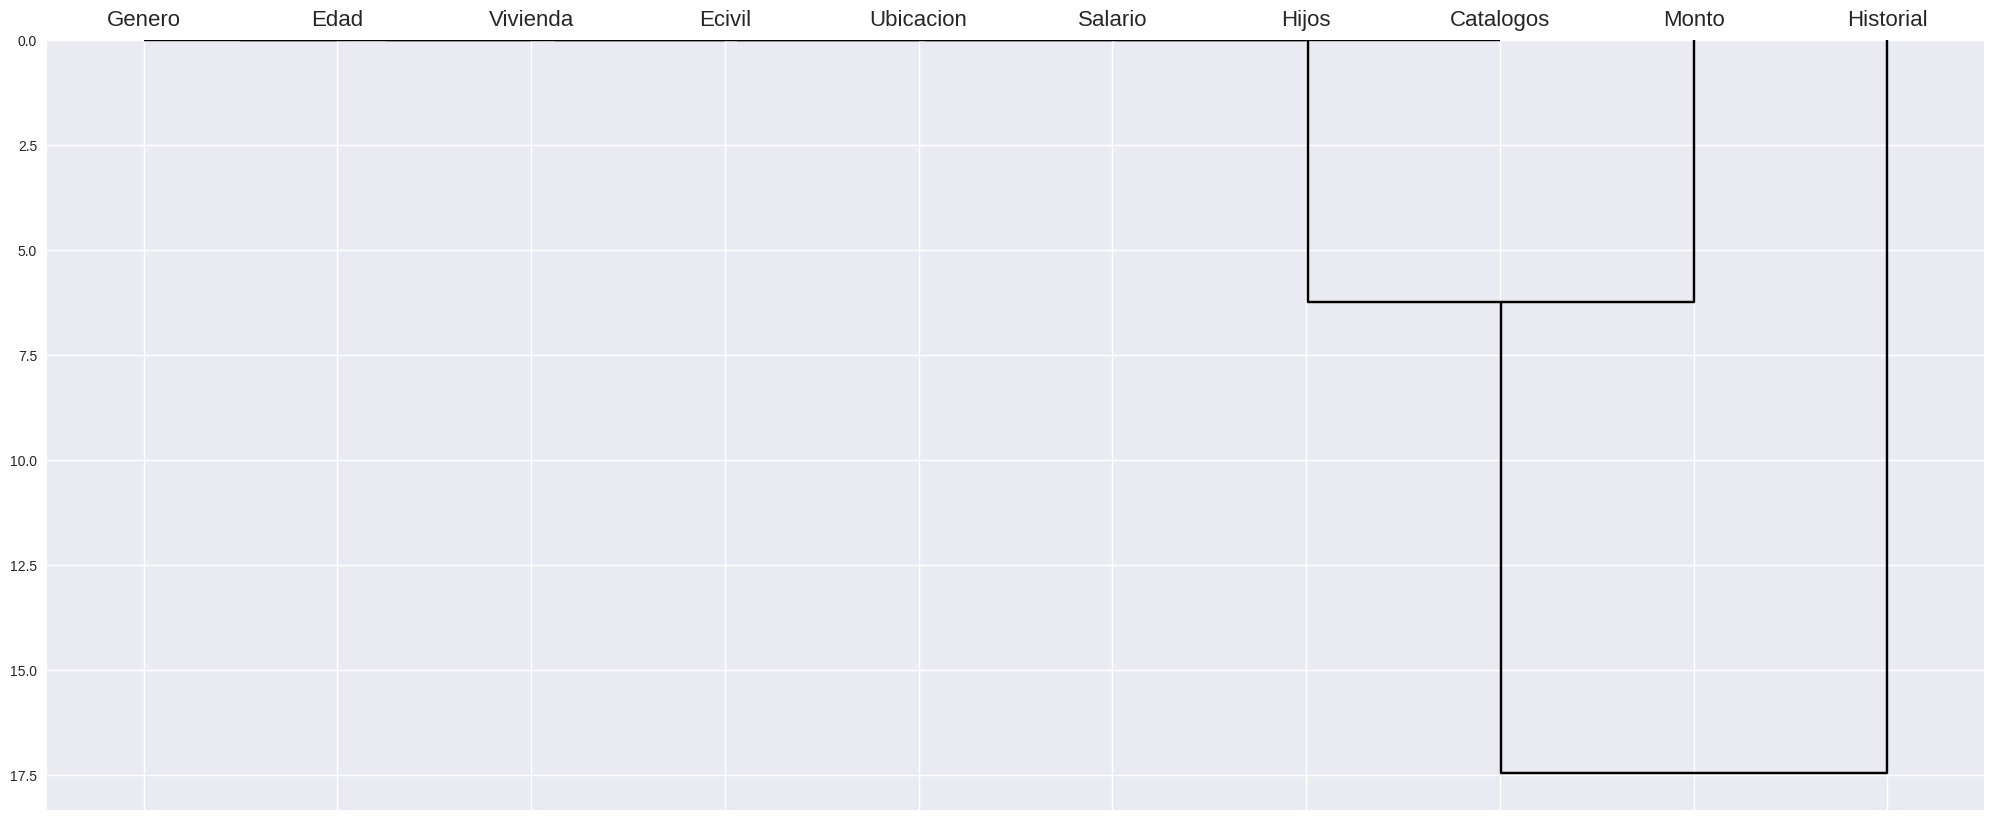

In [9]:
plt.figure(figsize=(1,1))
msno.dendrogram(df)
plt.show()

In [46]:
#conda install missingno

Channels:
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/manuel/anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    missingno-0.4.2            |     pyhd3eb1b0_1          15 KB
    ------------------------------------------------------------
                                           Total:          15 KB

The following NEW packages will be INSTALLED:

  missingno          pkgs/main/noarch::missingno-0.4.2-pyhd3eb1b0_1 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [11]:
df.isnull().sum()

Edad           0
Genero         0
Vivienda       0
Ecivil         0
Ubicacion      0
Salario        0
Hijos          0
Historial    303
Catalogos      0
Monto         39
dtype: int64

In [13]:
df.isnull().any()

Edad         False
Genero       False
Vivienda     False
Ecivil       False
Ubicacion    False
Salario      False
Hijos        False
Historial     True
Catalogos    False
Monto         True
dtype: bool

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Edad       1000 non-null   object 
 1   Genero     1000 non-null   object 
 2   Vivienda   1000 non-null   object 
 3   Ecivil     1000 non-null   object 
 4   Ubicacion  1000 non-null   object 
 5   Salario    1000 non-null   int64  
 6   Hijos      1000 non-null   int64  
 7   Historial  697 non-null    object 
 8   Catalogos  1000 non-null   int64  
 9   Monto      961 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 78.3+ KB


## metodos de imputación de datos

In [15]:
df.Historial.notnull().value_counts()

Historial
True     697
False    303
Name: count, dtype: int64

In [17]:
df.Monto.notnull().value_counts()

Monto
True     961
False     39
Name: count, dtype: int64

In [19]:
print("dimensión real:", df.shape) # Devolvemos la tupla con filas y columnas que representan el número de las mismas del dataFrame original
print("Dimensión sin NAs", df.dropna().shape) # Eliminamos todas las filas que contienen por lo menos un valor NAN y con shape, 
                                            # devolvemos la nueva dimensión despues de eleiminar las filas con valores NAN e imprimimos

dimensión real: (1000, 10)
Dimensión sin NAs (670, 10)


In [21]:
# Porcentaje de datos faltantes por columna
df.isnull().sum()/df.shape[0]*100

Edad          0.0
Genero        0.0
Vivienda      0.0
Ecivil        0.0
Ubicacion     0.0
Salario       0.0
Hijos         0.0
Historial    30.3
Catalogos     0.0
Monto         3.9
dtype: float64

In [23]:
df.isnull().sum()/(df.shape[0]*10)*100 
#isnull genera un dataFrame dinde cada celda es True si es NAN y False si np
#.sum() Cuenta valores NAN
# .shape[0] Devuelve el numero de filas del DataFrame
# *10 Multiplica por diez, compara los valores nulos contra diez veces la cantidad de filas
# /100 convierte la fracción en porcentaje
# Éste código sirve para escalar los valores de otra manera o estandarizar 
# los porcentajes en función de un conjunto de datos más grande

Edad         0.00
Genero       0.00
Vivienda     0.00
Ecivil       0.00
Ubicacion    0.00
Salario      0.00
Hijos        0.00
Historial    3.03
Catalogos    0.00
Monto        0.39
dtype: float64

# Tratamiento de valores faltantes NAN, NULL, etc.
* Eliminación: Es la opción más básica y sencilla pero siempre es importante evaluar el porcentaje de obsevaciones a eliminar (Por convención se acepta el 5%)
* Imputación: Remplazar el valor perdido con un valor conocido, métodos sencillos estadísticos MTC, o estructura complejas como lo son los modelos de regresión.
* Mantener: Analizar la información por separado. En procedimientos como la máxima verosimilitud se usan variantes como el algoritmo EM, Expectation-Maximization, con la finalidad de manejar valores faltantes.

In [ ]:
# Eliminación
# En el ejemplo anterior teniamos in 3.03 de datos faltantes, los cuales abarcan un 30% de los registros que se tienen


Eliminación Listwise (por lista). Esta imputación es la menos problematica si los datos son MCAR, MAR o MNAR

* MCAR (Missing Completely at Random): La eliminación es totalmente aleatoria, sin relación con la variable con la variable observable o no observable del dataset.
* MAR (Missing at Random): Los valores faltantes no son completamente aleatorios, pero su ausencia puede explicarse por otras variables en el data set p.ej. EN una encuesta de ingresos, los datos de salarios están ausentes con mayor frecuencia en personas jovenes, pero dentro del grupo jóvenes, la ausencia de este dato no depende de cuanto ganan.
* MNAR (Missing Not at Random): Los valores aleatorios dependen de la propia variable faltante lo que introduce sesgos grandes p.ej. En un estudio sobre consumo de alcohol, las personas que beben en exceso podrían evitar responder sobre su consumo. Se requiere de un modelo avanzado



In [25]:
df_drop = df.copy() # Copia del data set original

In [27]:
df_drop.head() # Headers y 5 registros

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,NaN


In [29]:
df_drop1 = df_drop.dropna() # #liminamos todos los registros que cuenten con valores faltantes

In [31]:
df_drop1.info() # Información del DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 670 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Edad       670 non-null    object 
 1   Genero     670 non-null    object 
 2   Vivienda   670 non-null    object 
 3   Ecivil     670 non-null    object 
 4   Ubicacion  670 non-null    object 
 5   Salario    670 non-null    int64  
 6   Hijos      670 non-null    int64  
 7   Historial  670 non-null    object 
 8   Catalogos  670 non-null    int64  
 9   Monto      670 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 57.6+ KB


In [33]:
df_drop2 = df_drop.dropna(subset=['Historial'])

In [35]:
df_drop2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 697 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Edad       697 non-null    object 
 1   Genero     697 non-null    object 
 2   Vivienda   697 non-null    object 
 3   Ecivil     697 non-null    object 
 4   Ubicacion  697 non-null    object 
 5   Salario    697 non-null    int64  
 6   Hijos      697 non-null    int64  
 7   Historial  697 non-null    object 
 8   Catalogos  697 non-null    int64  
 9   Monto      670 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 59.9+ KB


In [37]:
df_drop2.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,NaN


In [39]:
df_drop3 = df_drop.dropna(subset=['Historial','Monto']) # Indicar

In [41]:
df_drop3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 670 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Edad       670 non-null    object 
 1   Genero     670 non-null    object 
 2   Vivienda   670 non-null    object 
 3   Ecivil     670 non-null    object 
 4   Ubicacion  670 non-null    object 
 5   Salario    670 non-null    int64  
 6   Hijos      670 non-null    int64  
 7   Historial  670 non-null    object 
 8   Catalogos  670 non-null    int64  
 9   Monto      670 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 57.6+ KB


In [45]:
df_drop4 = df_drop.dropna(axis=1) # Se eliminan variables donde se tencgan vacios, se debería usar axi=1, por

In [47]:
df_drop4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Edad       1000 non-null   object
 1   Genero     1000 non-null   object
 2   Vivienda   1000 non-null   object
 3   Ecivil     1000 non-null   object
 4   Ubicacion  1000 non-null   object
 5   Salario    1000 non-null   int64 
 6   Hijos      1000 non-null   int64 
 7   Catalogos  1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [49]:
df_drop5 = df_drop.dropna(how='all') # Elimina solo filas que contienen todas las columnas con NAN

In [51]:
df_drop5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Edad       1000 non-null   object 
 1   Genero     1000 non-null   object 
 2   Vivienda   1000 non-null   object 
 3   Ecivil     1000 non-null   object 
 4   Ubicacion  1000 non-null   object 
 5   Salario    1000 non-null   int64  
 6   Hijos      1000 non-null   int64  
 7   Historial  697 non-null    object 
 8   Catalogos  1000 non-null   int64  
 9   Monto      961 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 78.3+ KB


In [53]:
df_drop5.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,NaN


In [55]:
df_drop6 = df_drop.dropna(how='any') # Valor que usa por defecto en la eliminación de la fila

In [57]:
df_drop6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 670 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Edad       670 non-null    object 
 1   Genero     670 non-null    object 
 2   Vivienda   670 non-null    object 
 3   Ecivil     670 non-null    object 
 4   Ubicacion  670 non-null    object 
 5   Salario    670 non-null    int64  
 6   Hijos      670 non-null    int64  
 7   Historial  670 non-null    object 
 8   Catalogos  670 non-null    int64  
 9   Monto      670 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 57.6+ KB


## Imputar:
Los valores faltantes son reemplazados con valores estimados basados en la información disponible de las variables.

In [5]:
df_impt1 = df.copy()

In [7]:
df_impt1.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,NaN


In [9]:
df_impt1['Monto1'] = df_impt1['Monto']

In [11]:
df_impt1['Monto']= df_impt1['Monto'].fillna(0) # fillna indica por que valores queremos que rellene el valor faltante

In [13]:
df_impt1.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto,Monto1
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,0.0,NaN


In [15]:
df_impt1[['Monto', 'Monto1']].describe()

,Monto,Monto1
count,1000.000000,961.000000
mean,1170.369000,1217.865765
std,974.819638,964.869546
min,0.000000,38.000000
25%,436.750000,489.000000
50%,912.000000,952.000000
75%,1649.500000,1694.000000
max,6217.000000,6217.000000


In [25]:
#df_impt1['Monto2']= df_impt1.Monto.fillna(df_impt1.Monto.median()) # Aquí se debe crear a partir de Monto1 y llenar con la median() de Monto

In [17]:
df_impt1['Monto2'] = df_impt1.Monto1.fillna(df_impt1.Monto.median())

In [19]:
df_impt1.Monto1.isnull().sum()

39

In [21]:
df_impt1[['Monto', 'Monto1','Monto2']].describe()

,Monto,Monto1,Monto2
count,1000.000000,961.000000,1000.000000
mean,1170.369000,1217.865765,1205.937000
std,974.819638,964.869546,947.701829
min,0.000000,38.000000,38.000000
25%,436.750000,489.000000,502.750000
50%,912.000000,952.000000,913.500000
75%,1649.500000,1694.000000,1649.500000
max,6217.000000,6217.000000,6217.000000


In [29]:
df_impt1['Monto3'] = df_impt1.Monto.fillna(df_impt1.Monto.mean())

In [31]:
df_impt1[['Monto','Monto1', 'Monto2', 'Monto3']].describe()

,Monto,Monto1,Monto2,Monto3
count,1000.000000,961.000000,1000.000000,1000.000000
mean,1170.369000,1217.865765,1170.369000,1170.369000
std,974.819638,964.869546,974.819638,974.819638
min,0.000000,38.000000,0.000000,0.000000
25%,436.750000,489.000000,436.750000,436.750000
50%,912.000000,952.000000,912.000000,912.000000
75%,1649.500000,1694.000000,1649.500000,1649.500000
max,6217.000000,6217.000000,6217.000000,6217.000000


In [79]:
df_impt1['Monto4']=df_impt1.Monto.fillna(method='pad') # Rellena el valor faltante con su valor anterior,  bfill reemplaza el valor faltante por el valor posterior

/tmp/ipykernel_4297/4276790358.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_impt1['Monto4']=df_impt1.Monto.fillna(method='pad') # Rellena el valor faltante con su valor anterior,  bfill reemplaza el valor faltante por el valor posterior


In [81]:
df_impt1.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto,Monto1,Monto2,Monto3,Monto4
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0,755.0,755.0,755.0,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0,1318.0,1318.0,1318.0,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0,296.0,296.0,296.0,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0,2436.0,2436.0,2436.0,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,0.0,NaN,0.0,0.0,0.0


In [83]:
df_impt1[['Monto','Monto1', 'Monto2', 'Monto3','Monto4']].describe()

,Monto,Monto1,Monto2,Monto3,Monto4
count,1000.000000,961.000000,1000.000000,1000.000000,1000.000000
mean,1170.369000,1217.865765,1170.369000,1170.369000,1170.369000
std,974.819638,964.869546,974.819638,974.819638,974.819638
min,0.000000,38.000000,0.000000,0.000000,0.000000
25%,436.750000,489.000000,436.750000,436.750000,436.750000
50%,912.000000,952.000000,912.000000,912.000000,912.000000
75%,1649.500000,1694.000000,1649.500000,1649.500000,1649.500000
max,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000


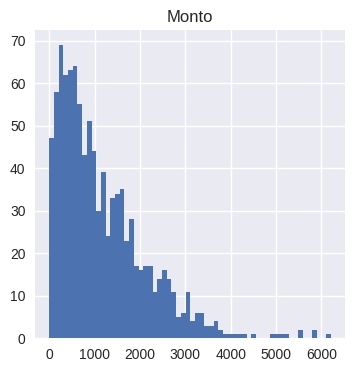

In [85]:
plt.figure(figsize=(4,4))
plt.title(df_impt1['Monto'].name)
plt.hist(df_impt1['Monto'], bins=60)
plt.show()

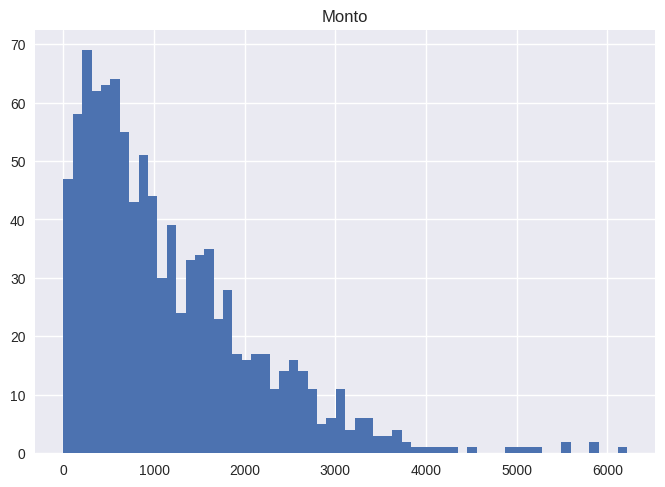

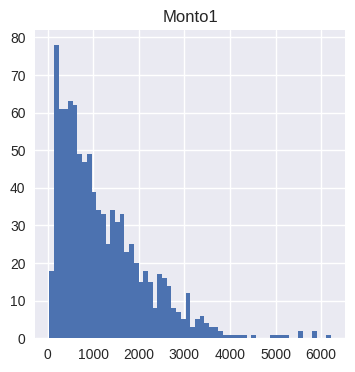

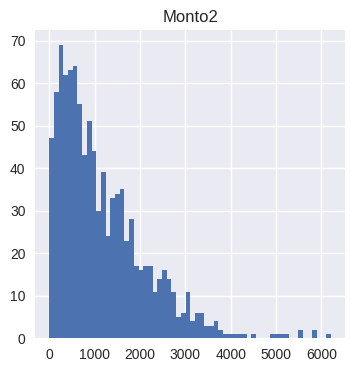

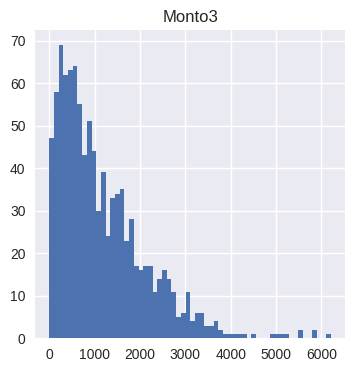

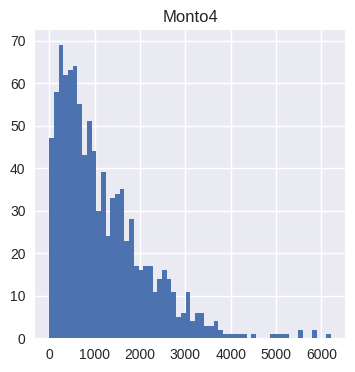

In [87]:
# Revisar la distribución de las diferentes imputaciones
for i in ['Monto', 'Monto1', 'Monto2', 'Monto3', 'Monto4']:
    plt.title(df_impt1[i].name)
    plt.hist(df_impt1[i], bins=60)
    plt.rcParams['figure.figsize'] = (4,4) #rcPrams diccionario glbal de matplotlib por defecto las figuras sean de 4x4

    plt.show()

### Comprendiendo la API del estimador Scikit Learn
Es una de las principales API implementadas por Scikit Learn. Proporciona una interfaz coherente para una amplia gama de aplicaciones de aprendizaje automático, por eso todos los algoritmos de aprendizaje automático de Scikit Learn se implementan a través de la API de Estimador. El objeto que aprende de los datos (ajustando los datos) es une stimado. Se puede utilizar con cualquiera de los algoritmos como clasificación, regresión, agrupación o incluso con un transformador, que **extrae características útiles de los datos sin procesar**.

**SimpleImputer:** Proporciona estrategias básicas para imputar valores perdidos. Los valores perdidos pueden ser imputados con un valor constante proporcionado, o utilizado las estadísticas (mean, median o most_frequent) de cada columna en la que se encuentran los valores perdidos. SimpleImputer también permite diferentes codificaciones de valores faltantes.

La librería **SimpleImputer** para el parametro **"strategy"**

Utiliza las siguientes estrategias de imputación:
Si es **"mean"**, reemplace los valores faltantes usando la media a lo largo de cada columna. Solo se puede usar con datos numéricos.

Si es **"median"**, reemplace los valores faltantes usando la mediana a lo largo de cada columna. Solo se puede usar con datos numéricos.

Si es **"most_frequent"**, reemplace los que faltan usando el valor más frecuente en cada columna.

Puede usarse con cadenas o datos numéricos. Si hay más de uno de esos valores, solo se devuelve el más pequeño.

Si es **"constant"**, reemplace los valores faltantes con `fill_value`. Puede usarse con cadenas o datos numéricos

In [92]:
df_impt2 = df.copy()

In [94]:
df_impt2.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,NaN


In [96]:
df_impt2.isnull().sum()

Edad           0
Genero         0
Vivienda       0
Ecivil         0
Ubicacion      0
Salario        0
Hijos          0
Historial    303
Catalogos      0
Monto         39
dtype: int64

In [98]:
impt_moda = SimpleImputer(strategy='most_frequent')

In [100]:
df_imptmoda = impt_moda.fit_transform(df_impt2) # Reemplaza los valores faltantes utilizando la estrategia most_frequent

In [122]:
df_impmoda = pd.DataFrame(df_imptmoda, columns=['Edad', 'Genero', 'Vivienda', 'Ecivil', 'Ubicacion', 'Salario', 'Hijos',
       'Historial', 'Catalogos', 'Monto' ])

In [124]:
df_impoda.head(10)

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1162.0
5,Joven,Masculino,Propia,Casado,Cerca,30400,0,Bajo,6,495.0
6,Media,Femenino,Alquilada,Soltero,Cerca,48100,0,Medio,12,782.0
7,Media,Masculino,Propia,Soltero,Cerca,68400,0,Alto,18,1155.0
8,Media,Femenino,Propia,Casado,Cerca,51900,3,Bajo,6,158.0
9,Adulta,Masculino,Propia,Casado,Lejos,80700,0,Alto,18,3034.0


In [126]:
df_impmoda.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1162.0


In [128]:
df_impmoda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Edad       1000 non-null   object
 1   Genero     1000 non-null   object
 2   Vivienda   1000 non-null   object
 3   Ecivil     1000 non-null   object
 4   Ubicacion  1000 non-null   object
 5   Salario    1000 non-null   object
 6   Hijos      1000 non-null   object
 7   Historial  1000 non-null   object
 8   Catalogos  1000 non-null   object
 9   Monto      1000 non-null   object
dtypes: object(10)
memory usage: 78.3+ KB


In [166]:
imp_media = SimpleImputer(strategy='mean') # Instancian SimpleImputer con las estrategia media

In [168]:
df_impmedia = imp_media.fit_transform(df_impt2[['Monto']]) # Creación de DataFrame y asignación la media del monto

In [190]:
df_impmedia

,Monto
0,755.00
1,1318.00
2,296.00
3,2436.00
4,1217.87
...,...
995,384.00
996,1073.00
997,1417.00
998,671.00


In [170]:
df_impmedia = np.round(df_impmedia, decimals=2)
df_impmedia

array([[ 755.  ],
       [1318.  ],
       [ 296.  ],
       [2436.  ],
       [1217.87],
       [ 495.  ],
       [ 782.  ],
       [1155.  ],
       [ 158.  ],
       [3034.  ],
       [ 927.  ],
       [2065.  ],
       [ 704.  ],
       [2136.  ],
       [5564.  ],
       [1217.87],
       [3010.  ],
       [1956.  ],
       [ 542.  ],
       [ 410.  ],
       [ 194.  ],
       [ 827.  ],
       [2328.  ],
       [ 808.  ],
       [ 521.  ],
       [ 655.  ],
       [ 707.  ],
       [2075.  ],
       [ 769.  ],
       [ 774.  ],
       [ 573.  ],
       [2082.  ],
       [2446.  ],
       [2636.  ],
       [2226.  ],
       [ 183.  ],
       [1595.  ],
       [ 584.  ],
       [ 982.  ],
       [ 576.  ],
       [ 410.  ],
       [3082.  ],
       [2437.  ],
       [3655.  ],
       [ 844.  ],
       [2510.  ],
       [ 983.  ],
       [1215.  ],
       [2000.  ],
       [2574.  ],
       [1116.  ],
       [3604.  ],
       [3360.  ],
       [ 530.  ],
       [ 906.  ],
       [27

In [156]:
def redondear_df(df_impmedia):
    return df.round(2)

In [158]:
redondear_df(df_impmedia)

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,NaN
...,...,...,...,...,...,...,...,...,...,...
995,Joven,Femenino,Alquilada,Soltero,Cerca,19400,1,NaN,18,384.0
996,Media,Masculino,Alquilada,Soltero,Lejos,40500,1,NaN,18,1073.0
997,Adulta,Masculino,Propia,Soltero,Cerca,44800,0,Medio,24,1417.0
998,Media,Masculino,Propia,Casado,Cerca,79000,2,Medio,18,671.0


In [172]:
df_impmedia = pd.DataFrame(df_impmedia, columns=['Monto'])

In [174]:
df_impmedia.head()

,Monto
0,755.00
1,1318.00
2,296.00
3,2436.00
4,1217.87


In [178]:
df_montoimputado = pd.concat([df_impt2, df_impmedia], axis=1)
df_montoimputado.head(10)

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0,755.00
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0,1318.00
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0,296.00
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0,2436.00
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,NaN,1217.87
5,Joven,Masculino,Propia,Casado,Cerca,30400,0,Bajo,6,495.0,495.00
6,Media,Femenino,Alquilada,Soltero,Cerca,48100,0,Medio,12,782.0,782.00
7,Media,Masculino,Propia,Soltero,Cerca,68400,0,Alto,18,1155.0,1155.00
8,Media,Femenino,Propia,Casado,Cerca,51900,3,Bajo,6,158.0,158.00
9,Adulta,Masculino,Propia,Casado,Lejos,80700,0,NaN,18,3034.0,3034.00


In [182]:
df_hismoda = impt_moda.fit_transform(df_impt2[['Historial']])

In [184]:
df_hismoda = pd.DataFrame(df_hismoda,columns=['HistorialImp'])

In [188]:
df_histimputado = pd.concat([df_montoimputado, df_hismoda], axis=1)
df_histimputado.head(10)

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto,Monto,HistorialImp
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0,755.00,Alto
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0,1318.00,Alto
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0,296.00,Bajo
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0,2436.00,Alto
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,NaN,1217.87,Alto
5,Joven,Masculino,Propia,Casado,Cerca,30400,0,Bajo,6,495.0,495.00,Bajo
6,Media,Femenino,Alquilada,Soltero,Cerca,48100,0,Medio,12,782.0,782.00,Medio
7,Media,Masculino,Propia,Soltero,Cerca,68400,0,Alto,18,1155.0,1155.00,Alto
8,Media,Femenino,Propia,Casado,Cerca,51900,3,Bajo,6,158.0,158.00,Bajo
9,Adulta,Masculino,Propia,Casado,Lejos,80700,0,NaN,18,3034.0,3034.00,Alto


In [194]:
df_completa = df_histimputado.drop(['Monto', 'Historial'], axis=1) # Data final, con variables imputadas de manera
df_completa.head(10)

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Catalogos,HistorialImp
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,6,Alto
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,6,Alto
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,18,Bajo
3,Media,Masculino,Propia,Casado,Cerca,85600,1,18,Alto
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,12,Alto
5,Joven,Masculino,Propia,Casado,Cerca,30400,0,6,Bajo
6,Media,Femenino,Alquilada,Soltero,Cerca,48100,0,12,Medio
7,Media,Masculino,Propia,Soltero,Cerca,68400,0,18,Alto
8,Media,Femenino,Propia,Casado,Cerca,51900,3,6,Bajo
9,Adulta,Masculino,Propia,Casado,Lejos,80700,0,18,Alto


## Imputar por modelos
Vamos a utilizar scikit-learn el cual contiene una cantidad de algoritmos que nos permiten trabajar AA con Python.

1. Separar los datos en matriz de características `features` y variables a predecir `y`
2. Seleccionar modelo
3. Elegir Parámetros
4. Ajustar o entrenar el modelo (`modelo.fit`)
5. Predecir con datos nuevos (`modelo.predict`) 

In [197]:
df.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,NaN


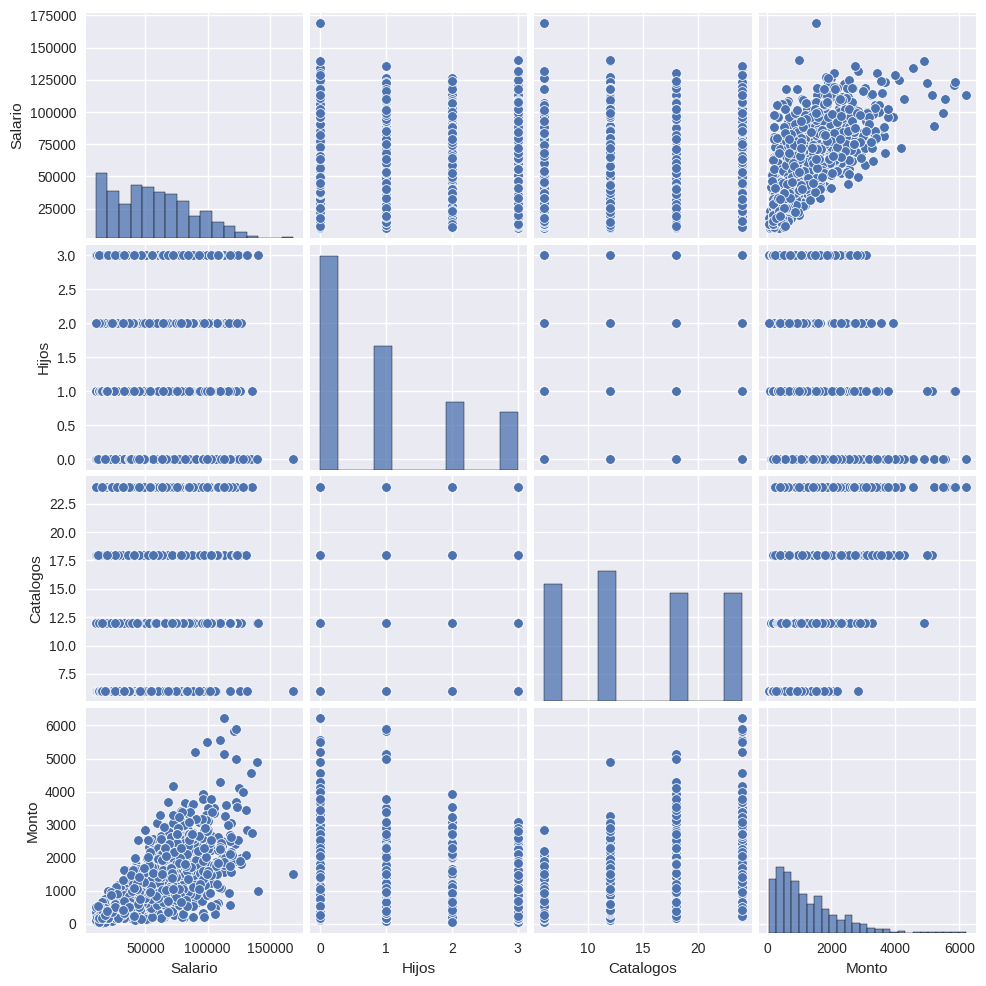

In [199]:
sns.pairplot(df)
plt.show()

In [201]:
df_reg=df.copy()

In [203]:
df_reg.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,NaN


In [205]:
df_reg_nonull = df_reg.dropna(subset=['Monto']) # La data de entrenamiento no deberá tener valores nulos

In [207]:
df_reg_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 961 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Edad       961 non-null    object 
 1   Genero     961 non-null    object 
 2   Vivienda   961 non-null    object 
 3   Ecivil     961 non-null    object 
 4   Ubicacion  961 non-null    object 
 5   Salario    961 non-null    int64  
 6   Hijos      961 non-null    int64  
 7   Historial  670 non-null    object 
 8   Catalogos  961 non-null    int64  
 9   Monto      961 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 82.6+ KB


In [209]:
x_train = df_reg_nonull[['Salario']] # Variable independiente (entrada del modelo)
y_train = df_reg_nonull[['Monto']] # Variable dependiente (lo que queremos predecir)

In [211]:
x_train.head()
y_train.head()

,Monto
0,755.0
1,1318.0
2,296.0
3,2436.0
5,495.0


Para generar la data de prueba debemos de traer a todos lo

In [213]:
df_reg.isnull()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,True,False,False
996,False,False,False,False,False,False,False,True,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [219]:
is_null = pd.isna(df_reg.loc[:, 'Monto'])
is_null

0      False
1      False
2      False
3      False
4       True
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Monto, Length: 1000, dtype: bool

In [223]:
df_reg_null = df_reg.loc[is_null] # Data set
df_reg_null.head(10)

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,NaN
15,Media,Femenino,Propia,Casado,Lejos,83100,1,NaN,12,NaN
65,Joven,Masculino,Alquilada,Casado,Cerca,66700,0,NaN,18,NaN
71,Media,Femenino,Propia,Casado,Lejos,90400,1,Alto,18,NaN
99,Media,Masculino,Alquilada,Casado,Lejos,87100,2,Alto,18,NaN
111,Media,Femenino,Propia,Soltero,Cerca,46600,2,NaN,18,NaN
122,Media,Femenino,Propia,Soltero,Lejos,66800,3,NaN,24,NaN
132,Joven,Masculino,Alquilada,Soltero,Cerca,19100,0,NaN,6,NaN
137,Media,Femenino,Propia,Soltero,Cerca,53700,3,Bajo,12,NaN
142,Media,Masculino,Propia,Casado,Lejos,103700,1,Alto,24,NaN


In [225]:
x_test = df_reg_null[['Salario']]
y_train = df_reg_nonull[['Monto']]

In [229]:
y_train.head()

,Monto
0,755.0
1,1318.0
2,296.0
3,2436.0
5,495.0


In [231]:
x_test.head()

,Salario
4,68400
15,83100
65,66700
71,90400
99,87100


In [233]:
from sklearn.linear_model import LinearRegression

In [235]:
imp_regression = LinearRegression()
imp_regression.fit(x_train, y_train)

LinearRegression()

In [237]:
ypred = imp_regression.predict(x_test)
ypred

array([[1491.97501296],
       [1816.03241512],
       [1454.49898686],
       [1976.95888013],
       [1904.21130006],
       [1011.40009003],
       [1456.70345898],
       [ 405.17025607],
       [1167.9176108 ],
       [2270.15367256],
       [1167.9176108 ],
       [1399.38718377],
       [1018.0135064 ],
       [ 208.97223707],
       [ 365.48975784],
       [1553.70023242],
       [1377.34246254],
       [ 264.08404016],
       [2406.83094422],
       [1760.92061203],
       [ 596.95933081],
       [ 885.74517899],
       [2107.02273542],
       [2594.21107472],
       [ 378.71659059],
       [ 788.74840556],
       [1339.86643644],
       [ 442.64628217],
       [2153.31665002],
       [1452.29451474],
       [ 989.3553688 ],
       [1311.20829883],
       [2367.150446  ],
       [2349.51466901],
       [1736.67141867],
       [ 378.71659059],
       [ 925.42567722],
       [1009.19561791],
       [ 257.47062379]])

In [239]:
ypred = np.round(ypred)
ypred

array([[1492.],
       [1816.],
       [1454.],
       [1977.],
       [1904.],
       [1011.],
       [1457.],
       [ 405.],
       [1168.],
       [2270.],
       [1168.],
       [1399.],
       [1018.],
       [ 209.],
       [ 365.],
       [1554.],
       [1377.],
       [ 264.],
       [2407.],
       [1761.],
       [ 597.],
       [ 886.],
       [2107.],
       [2594.],
       [ 379.],
       [ 789.],
       [1340.],
       [ 443.],
       [2153.],
       [1452.],
       [ 989.],
       [1311.],
       [2367.],
       [2350.],
       [1737.],
       [ 379.],
       [ 925.],
       [1009.],
       [ 257.]])

In [241]:
ypred = pd.DataFrame(ypred, columns=['Monto'])
ypred.head()

,Monto
0,1492.0
1,1816.0
2,1454.0
3,1977.0
4,1904.0


In [245]:
df_reg_null = df_reg_null.drop(['Monto'], axis=1)
df_reg_null.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12
15,Media,Femenino,Propia,Casado,Lejos,83100,1,NaN,12
65,Joven,Masculino,Alquilada,Casado,Cerca,66700,0,NaN,18
71,Media,Femenino,Propia,Casado,Lejos,90400,1,Alto,18
99,Media,Masculino,Alquilada,Casado,Lejos,87100,2,Alto,18


In [247]:
df_reg_null = df_reg_null.reset_index(drop=True)
ypred = ypred.reset_index(drop=True)

In [249]:
ypred.head()

,Monto
0,1492.0
1,1816.0
2,1454.0
3,1977.0
4,1904.0


In [253]:
df_imput_monto = pd.concat([df_reg_null, ypred], axis=1)
df_imput_monto.head(10)

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1492.0
1,Media,Femenino,Propia,Casado,Lejos,83100,1,NaN,12,1816.0
2,Joven,Masculino,Alquilada,Casado,Cerca,66700,0,NaN,18,1454.0
3,Media,Femenino,Propia,Casado,Lejos,90400,1,Alto,18,1977.0
4,Media,Masculino,Alquilada,Casado,Lejos,87100,2,Alto,18,1904.0
5,Media,Femenino,Propia,Soltero,Cerca,46600,2,NaN,18,1011.0
6,Media,Femenino,Propia,Soltero,Lejos,66800,3,NaN,24,1457.0
7,Joven,Masculino,Alquilada,Soltero,Cerca,19100,0,NaN,6,405.0
8,Media,Femenino,Propia,Soltero,Cerca,53700,3,Bajo,12,1168.0
9,Media,Masculino,Propia,Casado,Lejos,103700,1,Alto,24,2270.0


In [255]:
# Integramos data set imputado con el data set que no contiene null de monto, que a su vez 
# fuer parte del data set de entrenamiento
df_reg_nonull = df_reg_nonull.reset_index(drop=True)
df_imput_monto = df_imput_monto.reset_index(drop=True)

In [257]:
df_integrada = pd.concat([df_reg_nonull, df_imput_monto], axis=0)
df_integrada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 38
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Edad       1000 non-null   object 
 1   Genero     1000 non-null   object 
 2   Vivienda   1000 non-null   object 
 3   Ecivil     1000 non-null   object 
 4   Ubicacion  1000 non-null   object 
 5   Salario    1000 non-null   int64  
 6   Hijos      1000 non-null   int64  
 7   Historial  697 non-null    object 
 8   Catalogos  1000 non-null   int64  
 9   Monto      1000 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 85.9+ KB


In [259]:
df_integrada.head(10)

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Joven,Masculino,Propia,Casado,Cerca,30400,0,Bajo,6,495.0
5,Media,Femenino,Alquilada,Soltero,Cerca,48100,0,Medio,12,782.0
6,Media,Masculino,Propia,Soltero,Cerca,68400,0,Alto,18,1155.0
7,Media,Femenino,Propia,Casado,Cerca,51900,3,Bajo,6,158.0
8,Adulta,Masculino,Propia,Casado,Lejos,80700,0,NaN,18,3034.0
9,Joven,Masculino,Alquilada,Casado,Cerca,43700,1,NaN,12,927.0


### Datos cualitativos

In [262]:
df_arb = df_integrada.copy()

In [264]:
df_arb.head(10)

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Joven,Masculino,Propia,Casado,Cerca,30400,0,Bajo,6,495.0
5,Media,Femenino,Alquilada,Soltero,Cerca,48100,0,Medio,12,782.0
6,Media,Masculino,Propia,Soltero,Cerca,68400,0,Alto,18,1155.0
7,Media,Femenino,Propia,Casado,Cerca,51900,3,Bajo,6,158.0
8,Adulta,Masculino,Propia,Casado,Lejos,80700,0,NaN,18,3034.0
9,Joven,Masculino,Alquilada,Casado,Cerca,43700,1,NaN,12,927.0


In [266]:
df_arb_train = df_arb.dropna(subset=['Historial'])
df_arb_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 697 entries, 0 to 37
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Edad       697 non-null    object 
 1   Genero     697 non-null    object 
 2   Vivienda   697 non-null    object 
 3   Ecivil     697 non-null    object 
 4   Ubicacion  697 non-null    object 
 5   Salario    697 non-null    int64  
 6   Hijos      697 non-null    int64  
 7   Historial  697 non-null    object 
 8   Catalogos  697 non-null    int64  
 9   Monto      697 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 59.9+ KB


In [268]:
x_train = df_arb_train[['Edad','Genero','Ecivil']]
y_train = df_arb_train[['Historial']]

In [270]:
x_train.head()

,Edad,Genero,Ecivil
0,Adulta,Femenino,Soltero
1,Media,Masculino,Soltero
2,Joven,Femenino,Soltero
3,Media,Masculino,Casado
4,Joven,Masculino,Casado


In [272]:
df_arb.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Joven,Masculino,Propia,Casado,Cerca,30400,0,Bajo,6,495.0


In [278]:
is_null_hist = pd.isna(df_arb.loc[:, 'Historial']) # : Buscamos todas las filas
is_null_hist # isna detecta Valores nulos NAN retorno será un booleano

0     False
1     False
2     False
3     False
4     False
      ...  
34    False
35     True
36    False
37    False
38     True
Name: Historial, Length: 1000, dtype: bool

In [280]:
df_arb_null = df_arb.loc[is_null_hist] # Data set test
df_arb_null.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
8,Adulta,Masculino,Propia,Casado,Lejos,80700,0,NaN,18,3034.0
9,Joven,Masculino,Alquilada,Casado,Cerca,43700,1,NaN,12,927.0
22,Joven,Femenino,Alquilada,Casado,Cerca,41700,1,NaN,6,521.0
24,Media,Masculino,Propia,Soltero,Cerca,62800,3,NaN,6,707.0
27,Joven,Masculino,Alquilada,Soltero,Cerca,21700,1,NaN,18,774.0


In [282]:
x_test = df_arb_null[['Edad', 'Genero', 'Ecivil']]
x_test.head()

,Edad,Genero,Ecivil
8,Adulta,Masculino,Casado
9,Joven,Masculino,Casado
22,Joven,Femenino,Casado
24,Media,Masculino,Soltero
27,Joven,Masculino,Soltero


In [290]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
le=defaultdict(LabelEncoder) # Definimos la función

In [298]:
fit=x_train.apply(lambda x: le[x.name].fit_transform(x)) # ajusto, entreno o entiendo lo que necesito
x_train2=x_train.apply(lambda x: le[x.name].transform(x)) # Aplico, transformo o predigo

`le[x.name]`: Se asume que le es un diccionario donde cada clave es el nombre de una columna y el valor  es una instancia de LabelEncoder().

fit_transform(x): fit() Aprende la relación entre las categorías y los valores numéricos

Resultado: fit contiene x_train transformdo en valores numéricos, además de que el Label Encoder ya está entrenado

Se usa solo transform() sun fit(), lo que significa que:

Usa el mapeo aprendido en fit() para transformar los datos sin modificar el LabelEncoder 

In [300]:
x_train2.head(10)

,Edad,Genero,Ecivil
0,0,0,1
1,2,1,1
2,1,0,1
3,2,1,0
4,1,1,0
5,2,0,1
6,2,1,1
7,2,0,0
10,2,1,0
11,2,0,0


In [302]:
from sklearn import tree

In [304]:
model_tree = tree.DecisionTreeClassifier(criterion='entropy', # P. Defecto es gini
                                         min_samples_split =20, #p. defecto son 2 muestras necesarias 
                                         min_samples_leaf=5, # Numero minimo de muestras 
                                         max_depth=3, #Por defecto en ningugo, profundidad del arbol
                                        )
model_tree.fit(x_train2, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=20)

In [306]:
# Predecimos la variable historial usando la data test; pero antes de debe transformar el data set
x_test2 = x_test.apply(lambda x: le[x.name].transform(x))
x_test2.head()

,Edad,Genero,Ecivil
8,0,1,0
9,1,1,0
22,1,0,0
24,2,1,1
27,1,1,1


In [308]:
y_pred = model_tree.predict(x_test2) # prediccion
df_pred = pd.DataFrame(y_pred, columns=['Historial']) #General el DF
df_pred.head()

,Historial
0,Alto
1,Medio
2,Medio
3,Medio
4,Bajo


In [310]:
df_pred

,Historial
0,Alto
1,Medio
2,Medio
3,Medio
4,Bajo
...,...
298,Alto
299,Bajo
300,Medio
301,Bajo


In [312]:
df_arb_null=df_arb_null.drop(['Historial'], axis=1)
df_arb_null.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Catalogos,Monto
8,Adulta,Masculino,Propia,Casado,Lejos,80700,0,18,3034.0
9,Joven,Masculino,Alquilada,Casado,Cerca,43700,1,12,927.0
22,Joven,Femenino,Alquilada,Casado,Cerca,41700,1,6,521.0
24,Media,Masculino,Propia,Soltero,Cerca,62800,3,6,707.0
27,Joven,Masculino,Alquilada,Soltero,Cerca,21700,1,18,774.0


In [320]:
df_arb_null = df_arb_null.reset_index(drop=True)
df_pred = df_pred.reset_index(drop=True)

In [324]:
df_imput_arb = pd.concat([df_arb_null, df_pred], axis=1)
df_imput_arb.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Catalogos,Monto,Historial
0,Adulta,Masculino,Propia,Casado,Lejos,80700,0,18,3034.0,Alto
1,Joven,Masculino,Alquilada,Casado,Cerca,43700,1,12,927.0,Medio
2,Joven,Femenino,Alquilada,Casado,Cerca,41700,1,6,521.0,Medio
3,Media,Masculino,Propia,Soltero,Cerca,62800,3,6,707.0,Medio
4,Joven,Masculino,Alquilada,Soltero,Cerca,21700,1,18,774.0,Bajo


In [326]:
df_imput_arb = df_imput_arb.reset_index(drop=True)
df_arb_train=df_arb_train.reset_index(drop=True)

df_final_imp_modelos = pd.concat([df_arb_train, df_imput_arb], axis=0)

df_final_imp_modelos.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Joven,Masculino,Propia,Casado,Cerca,30400,0,Bajo,6,495.0


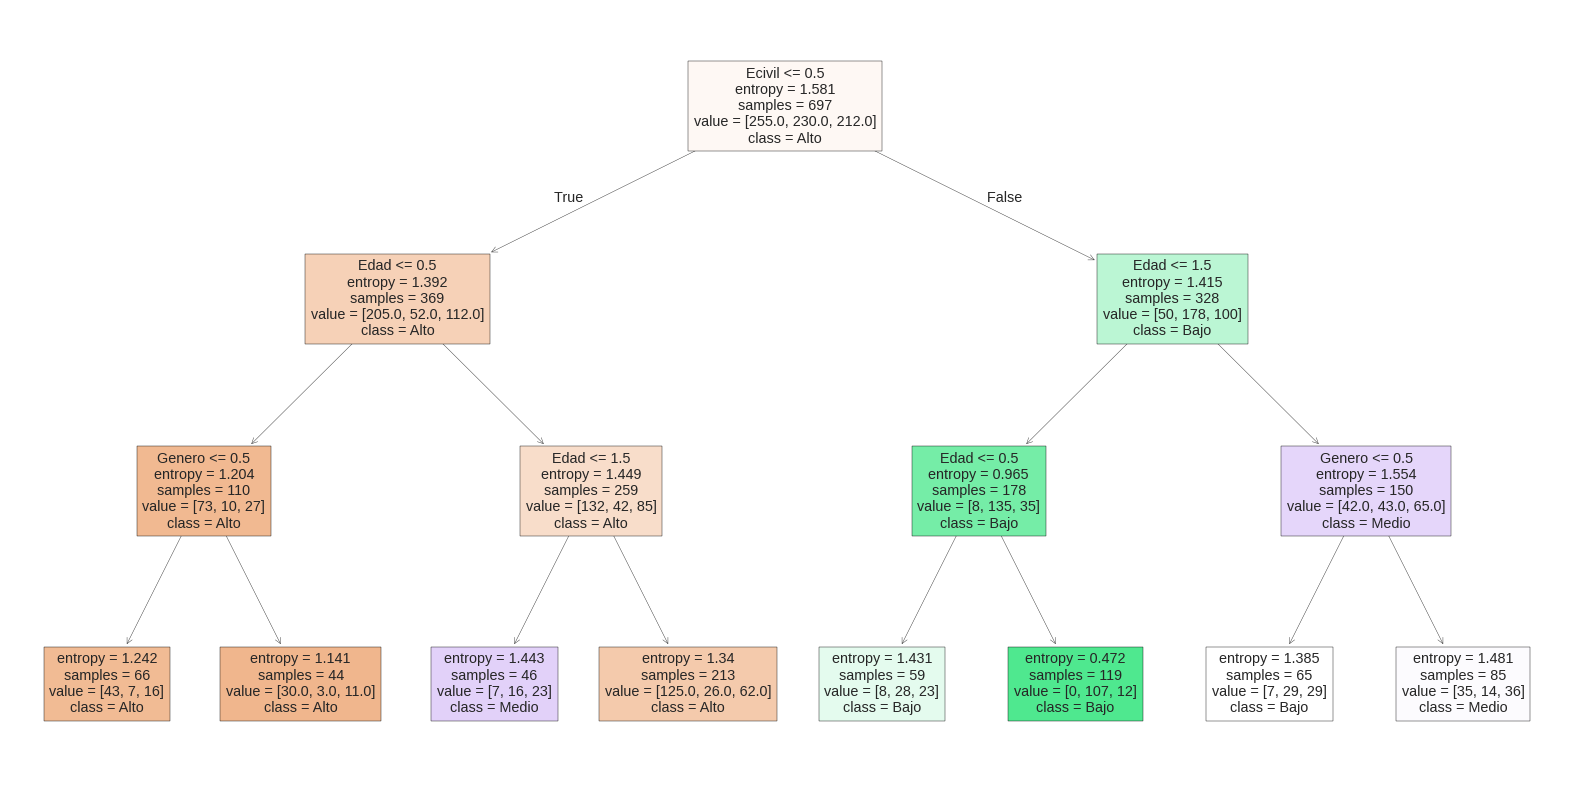

In [334]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(model_tree, 
               feature_names=x_train.columns,
               class_names=y_train['Historial'].unique(), 
               filled=True)

plt.show()